# **1. Analyse exploratoire des données**

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Charger les fichiers depuis Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Nettoyage et normalisation des données des clients**

In [3]:
# Charger les données
clients = pd.read_csv("/content/drive/MyDrive/projet_dm/Clients.csv", encoding='latin1')

In [4]:
# Afficher les premières lignes pour vérification
clients.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,25,F,159,En Couple,2,false,3467 SB 72
1,53,M,594,En Couple,2,false,113 LY 42
2,20,F,949,En Couple,1,false,925 WK 87
3,29,M,571,En Couple,2,false,3279 RV 81
4,47,M,502,En Couple,1,false,82 RZ 54


In [5]:
# Affiche les valeurs uniques des colonnes
print("age : ",clients['age'].unique())
print("sexe : ",clients['sexe'].unique())
print("taux : ",clients['taux'].unique())
print("situationFamiliale : ",clients['situationFamiliale'].unique())
print("nbEnfantsAcharge : ",clients['nbEnfantsAcharge'].unique())
print("2eme voiture : ",clients['2eme voiture'].unique())
print("immatriculation : ",clients['immatriculation'].unique())

age :  ['25' '53' '20' '29' '47' '52' '58' '21' '42' '66' '54' '41' '63' '46'
 '43' '23' '49' '65' '24' '64' '45' '40' '28' '18' '32' '34' '36' '55'
 '79' '33' '39' '48' '71' '51' '57' '37' '81' '75' '62' '19' '30' '67'
 '26' '22' '80' '83' '82' '38' '35' '72' '70' '27' '77' '59' '60' ' ' '31'
 '73' '76' '61' '44' '68' '69' '50' '78' '56' '74' '84' '?' '-1']
sexe :  ['F' 'M' 'Homme' 'Masculin' 'Féminin' ' ' 'Femme' 'N/D' '?']
taux :  ['159' '594' '949' ... '751' '882' '900']
situationFamiliale :  ['En Couple' 'Célibataire' 'Seule' ' ' 'Marié(e)' 'N/D' 'Divorcée' 'Seul'
 '?']
nbEnfantsAcharge :  ['2' '1' '3' '4' '0' '-1' ' ' '?']
2eme voiture :  ['false' 'true' ' ' '?']
immatriculation :  ['3467 SB 72' '113 LY 42' '925 WK 87' ... '5803 LS 45' '3783 DX 64'
 '4656 EJ 74']


In [6]:
# Nettoyage et normalisation des colonnes
clients['age'] = pd.to_numeric(clients['age'].replace([' ', '?', '-1'], np.nan), errors='coerce')
clients['sexe'] = clients['sexe'].str.strip().str.lower().replace({
    'homme': 'm', 'masculin': 'm',
    'femme': 'f', 'féminin': 'f',
    'n/d': np.nan, 'nd': np.nan, '?': np.nan, ' ': np.nan
})
clients['taux'] = pd.to_numeric(clients['taux'].replace([' ', '?'], np.nan), errors='coerce')
clients['situationFamiliale'] = clients['situationFamiliale'].str.strip().str.lower().replace({
    'en couple': 'couple',
    'seule': 'célibataire',
    'marié(e)': 'couple',
    'divorcée': 'célibataire',
    'seul': 'célibataire',
    'n/d': np.nan, '?': np.nan, 'nd': np.nan, ' ': np.nan
})
clients['nbEnfantsAcharge'] = pd.to_numeric(clients['nbEnfantsAcharge'].replace([' ', '?', '-1'], np.nan), errors='coerce')
clients['2eme voiture'] = clients['2eme voiture'].astype(str).str.strip().replace({'n/d': np.nan, 'nd': np.nan, '?': np.nan, ' ': np.nan})

In [7]:
# Remplacer les valeurs manquantes des colonnes numériques par la médiane de chaque colonne
num_cols = ['age', 'taux', 'nbEnfantsAcharge']
for col in num_cols:
    clients[col].fillna(clients[col].median(), inplace=True)

<ipython-input-7-40ae1fe17f2b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clients[col].fillna(clients[col].median(), inplace=True)


In [8]:
# Remplacer les valeurs manquantes dans les colonnes catégorielles par le mode
cat_cols = ['sexe', 'situationFamiliale', '2eme voiture']
for col in cat_cols:
    clients[col].fillna(clients[col].mode()[0], inplace=True)

<ipython-input-8-0f500d4428f0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clients[col].fillna(clients[col].mode()[0], inplace=True)


In [9]:
clients['immatriculation'] = clients['immatriculation'].str.strip().str.lower()

In [10]:
# Suppression des lignes vides
clients = clients[clients.apply(lambda x: x.notnull().all() and x.astype(str).str.strip().ne('').all(), axis=1)]

In [11]:
# Affiche les valeurs uniques des colonnes
print("age : ",clients['age'].unique())
print("sexe : ",clients['sexe'].unique())
print("taux : ",clients['taux'].unique())
print("situationFamiliale : ",clients['situationFamiliale'].unique())
print("nbEnfantsAcharge : ",clients['nbEnfantsAcharge'].unique())
print("2eme voiture : ",clients['2eme voiture'].unique())
print("immatriculation : ",clients['immatriculation'].unique())

age :  [25. 53. 20. 29. 47. 52. 58. 21. 42. 66. 54. 41. 63. 46. 43. 23. 49. 65.
 24. 64. 45. 40. 28. 18. 32. 34. 36. 55. 79. 33. 39. 48. 71. 51. 57. 37.
 81. 75. 62. 19. 30. 67. 26. 22. 80. 83. 82. 38. 35. 72. 70. 27. 77. 59.
 60. 31. 73. 76. 61. 44. 68. 69. 50. 78. 56. 74. 84.]
sexe :  ['f' 'm']
taux :  [159. 594. 949. ... 882. 886. 900.]
situationFamiliale :  ['couple' 'célibataire']
nbEnfantsAcharge :  [2. 1. 3. 4. 0.]
2eme voiture :  ['false' 'true']
immatriculation :  ['3467 sb 72' '113 ly 42' '925 wk 87' ... '5803 ls 45' '3783 dx 64'
 '4656 ej 74']


In [12]:
# Affiche le nombre de lignes et de colonnes du DataFrame 'clients'
print("Dimensions du DataFrame (lignes, colonnes) : ", clients.shape)

Dimensions du DataFrame (lignes, colonnes) :  (99670, 7)


# **Nettoyage et normalisation des données marketing**

In [13]:
# Charger les données
marketing = pd.read_csv("/content/drive/MyDrive/projet_dm/Marketing.csv", encoding='latin1')

In [14]:
# Afficher les premières lignes pour vérification
marketing.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,21,F,1396,Célibataire,0,False
1,35,M,223,Célibataire,0,False
2,48,M,401,Célibataire,0,False
3,26,F,420,En Couple,3,True
4,80,M,530,En Couple,3,False


In [15]:
# Affiche les valeurs uniques des colonnes
print("age : ",marketing['age'].unique())
print("sexe : ",marketing['sexe'].unique())
print("taux : ",marketing['taux'].unique())
print("situationFamiliale : ",marketing['situationFamiliale'].unique())
print("nbEnfantsAcharge : ",marketing['nbEnfantsAcharge'].unique())
print("2eme voiture : ",marketing['2eme voiture'].unique())

age :  [21 35 48 26 80 27 59 43 64 22 79 55 19 34 60 58 54]
sexe :  ['F' 'M']
taux :  [1396  223  401  420  530  153  572  431  559  154  981  588  212 1112
  524  411 1192  452  589  748]
situationFamiliale :  ['Célibataire' 'En Couple']
nbEnfantsAcharge :  [0 3 2 1]
2eme voiture :  [False  True]


In [16]:
# **Nettoyage des colonnes marketing**
marketing['sexe'] = marketing['sexe'].str.strip().str.lower()
marketing['situationFamiliale'] = marketing['situationFamiliale'].str.strip().str.lower().replace({'en couple': 'couple'})
marketing['nbEnfantsAcharge'] = pd.to_numeric(marketing['nbEnfantsAcharge'].replace([' ', '?'], np.nan), errors='coerce')
marketing['nbEnfantsAcharge'].fillna(0, inplace=True)
marketing['2eme voiture'] = marketing['2eme voiture'].astype(str).str.lower()

<ipython-input-16-8fb59c318f03>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing['nbEnfantsAcharge'].fillna(0, inplace=True)


In [17]:
# Suppression des lignes vides
marketing = marketing[marketing.apply(lambda x: x.notnull().all() and x.astype(str).str.strip().ne('').all(), axis=1)]

In [18]:
# Affiche les valeurs uniques des colonnes
print("age : ",marketing['age'].unique())
print("sexe : ",marketing['sexe'].unique())
print("taux : ",marketing['taux'].unique())
print("situationFamiliale : ",marketing['situationFamiliale'].unique())
print("nbEnfantsAcharge : ",marketing['nbEnfantsAcharge'].unique())
print("2eme voiture : ",marketing['2eme voiture'].unique())

age :  [21 35 48 26 80 27 59 43 64 22 79 55 19 34 60 58 54]
sexe :  ['f' 'm']
taux :  [1396  223  401  420  530  153  572  431  559  154  981  588  212 1112
  524  411 1192  452  589  748]
situationFamiliale :  ['célibataire' 'couple']
nbEnfantsAcharge :  [0 3 2 1]
2eme voiture :  ['false' 'true']


In [19]:
# Affiche le nombre de lignes et de colonnes du DataFrame 'marketing'
print("Dimensions du DataFrame (lignes, colonnes) : ", marketing.shape)

Dimensions du DataFrame (lignes, colonnes) :  (20, 6)


# **Nettoyage et normalisation des données des immatriculations**

In [20]:
# Charger les données
immatriculations = pd.read_csv("/content/drive/MyDrive/projet_dm/Immatriculations_small.csv", encoding='latin1')

In [21]:
# Afficher les premières lignes pour vérification
immatriculations.head()

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3467 SB 72,Seat,Toledo 1.6,102,longue,5,5,bleu,False,18880
1,113 LY 42,Renault,Vel Satis 3.5 V6,245,trÃ¨s longue,5,5,noir,False,49200
2,925 WK 87,Jaguar,X-Type 2.5 V6,197,longue,5,5,blanc,False,37100
3,3279 RV 81,Renault,Laguna 2.0T,170,longue,5,5,gris,False,27300
4,82 RZ 54,Fiat,Croma 2.2,147,longue,5,5,bleu,False,24780


In [22]:
# Affiche les valeurs uniques des colonnes
print("immatriculation : ",immatriculations['immatriculation'].unique())
print("marque : ",immatriculations['marque'].unique())
print("nom : ",immatriculations['nom'].unique())
print("puissance : ",immatriculations['puissance'].unique())
print("longueur : ",immatriculations['longueur'].unique())
print("nbPlaces : ",immatriculations['nbPlaces'].unique())
print("nbPortes : ",immatriculations['nbPortes'].unique())
print("couleur : ",immatriculations['couleur'].unique())
print("occasion : ",immatriculations['occasion'].unique())
print("prix : ",immatriculations['prix'].unique())

immatriculation :  ['3467 SB 72' '113 LY 42' '925 WK 87' ... '5803 LS 45' '3783 DX 64'
 '4656 EJ 74']
marque :  ['Seat' 'Renault' 'Jaguar' 'Fiat' 'BMW' 'Volvo' 'Peugeot' 'Nissan'
 'Mercedes' 'Audi' 'Kia' 'Volkswagen' 'Ford' 'Mini' 'Dacia' 'Daihatsu'
 'Lancia' 'Saab' 'Skoda']
nom :  ['Toledo 1.6' 'Vel Satis 3.5 V6' 'X-Type 2.5 V6' 'Laguna 2.0T' 'Croma 2.2'
 'M5' 'S80 T6' 'Megane 2.0 16V' '1007 1.4' 'Maxima 3.0 V6' 'S500' 'A2 1.4'
 'Picanto 1.1' 'Polo 1.2 6V' 'Mondeo 1.8' 'Copper 1.6 16V' 'Golf 2.0 FSI'
 'Logan 1.6 MPI' 'Cuore 1.0' 'Ypsilon 1.4 16V' '9.3 1.8T' 'A200' '120i'
 'A3 2.0 FSI' 'New Beatle 1.8' 'Almera 1.8' 'Primera 1.6' 'Superb 2.8 V6']
puissance :  [102 245 197 170 147 507 272 135  75 200 306  65  55 125 115 150  90  58
 136 110 109 193]
longueur :  ['longue' 'trÃ¨s longue' 'moyenne' 'courte']
nbPlaces :  [5]
nbPortes :  [5 3]
couleur :  ['bleu' 'noir' 'blanc' 'gris' 'rouge']
occasion :  [False  True]
prix :  [ 18880  49200  37100  27300  24780  66360  35350  22350  34440  17

In [23]:
# **Nettoyage des colonnes immatriculations**
immatriculations['immatriculation'] = immatriculations['immatriculation'].str.strip().str.lower()
immatriculations['marque'] = immatriculations['marque'].str.strip().str.lower()
immatriculations['nom'] = immatriculations['nom'].str.strip().str.lower()


# Nettoyage de plusieurs colonnes
cols_to_clean = ['puissance', 'nbPlaces', 'nbPortes', 'prix']
for col in cols_to_clean:
    immatriculations[col] = pd.to_numeric(immatriculations[col].replace([' ', '?'], np.nan), errors='coerce')

# Normalisation de la colonne 'longueur'
immatriculations['longueur'] = immatriculations['longueur'].astype(str).str.strip().str.lower().replace({'trã¨s longue': 'très longue'})

In [24]:
# Suppression des lignes vides
immatriculations = immatriculations[immatriculations.apply(lambda x: x.notnull().all() and x.astype(str).str.strip().ne('').all(), axis=1)]

In [25]:
# Affiche les valeurs uniques des colonnes
print("immatriculation : ",immatriculations['immatriculation'].unique())
print("marque : ",immatriculations['marque'].unique())
print("nom : ",immatriculations['nom'].unique())
print("puissance : ",immatriculations['puissance'].unique())
print("longueur : ",immatriculations['longueur'].unique())
print("nbPlaces : ",immatriculations['nbPlaces'].unique())
print("nbPortes : ",immatriculations['nbPortes'].unique())
print("couleur : ",immatriculations['couleur'].unique())
print("occasion : ",immatriculations['occasion'].unique())
print("prix : ",immatriculations['prix'].unique())

immatriculation :  ['3467 sb 72' '113 ly 42' '925 wk 87' ... '5803 ls 45' '3783 dx 64'
 '4656 ej 74']
marque :  ['seat' 'renault' 'jaguar' 'fiat' 'bmw' 'volvo' 'peugeot' 'nissan'
 'mercedes' 'audi' 'kia' 'volkswagen' 'ford' 'mini' 'dacia' 'daihatsu'
 'lancia' 'saab' 'skoda']
nom :  ['toledo 1.6' 'vel satis 3.5 v6' 'x-type 2.5 v6' 'laguna 2.0t' 'croma 2.2'
 'm5' 's80 t6' 'megane 2.0 16v' '1007 1.4' 'maxima 3.0 v6' 's500' 'a2 1.4'
 'picanto 1.1' 'polo 1.2 6v' 'mondeo 1.8' 'copper 1.6 16v' 'golf 2.0 fsi'
 'logan 1.6 mpi' 'cuore 1.0' 'ypsilon 1.4 16v' '9.3 1.8t' 'a200' '120i'
 'a3 2.0 fsi' 'new beatle 1.8' 'almera 1.8' 'primera 1.6' 'superb 2.8 v6']
puissance :  [102 245 197 170 147 507 272 135  75 200 306  65  55 125 115 150  90  58
 136 110 109 193]
longueur :  ['longue' 'très longue' 'moyenne' 'courte']
nbPlaces :  [5]
nbPortes :  [5 3]
couleur :  ['bleu' 'noir' 'blanc' 'gris' 'rouge']
occasion :  [False  True]
prix :  [ 18880  49200  37100  27300  24780  66360  35350  22350  34440  173

# **Nettoyage et normalisation des données des catalogue**

In [26]:
# Charger les données
catalogue = pd.read_csv("/content/drive/MyDrive/projet_dm/Catalogue.csv", encoding='latin1')

In [27]:
# Afficher les premières lignes pour vérification
catalogue.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350


In [28]:
# Affiche les valeurs uniques des colonnes
print("marque : ",catalogue['marque'].unique())
print("nom : ",catalogue['nom'].unique())
print("puissance : ",catalogue['puissance'].unique())
print("longueur : ",catalogue['longueur'].unique())
print("nbPlaces : ",catalogue['nbPlaces'].unique())
print("nbPortes : ",catalogue['nbPortes'].unique())
print("couleur : ",catalogue['couleur'].unique())
print("occasion : ",catalogue['occasion'].unique())
print("prix : ",catalogue['prix'].unique())

marque :  ['Volvo' 'Volkswagen' 'Skoda' 'Seat' 'Saab' 'Renault' 'Peugeot' 'Nissan'
 'Mini' 'Mercedes' 'Lancia' 'Kia' 'Jaguar' 'Hyundaï' 'Honda' 'Ford' 'Fiat'
 'Daihatsu' 'Dacia' 'BMW' 'Audi']
nom :  ['S80 T6' 'Touran 2.0 FSI' 'Polo 1.2 6V' 'New Beatle 1.8' 'Golf 2.0 FSI'
 'Superb 2.8 V6' 'Toledo 1.6' '9.3 1.8T' 'Vel Satis 3.5 V6'
 'Megane 2.0 16V' 'Laguna 2.0T' 'Espace 2.0T' '1007 1.4' 'Primera 1.6'
 'Maxima 3.0 V6' 'Almera 1.8' 'Copper 1.6 16V' 'S500' 'A200'
 'Ypsilon 1.4 16V' 'Picanto 1.1' 'X-Type 2.5 V6' 'Matrix 1.6' 'FR-V 1.7'
 'Mondeo 1.8' 'Croma 2.2' 'Cuore 1.0' 'Logan 1.6 MPI' 'M5' '120i'
 'A3 2.0 FSI' 'A2 1.4']
puissance :  [272 150  55 110 193 102 245 135 170 165  75 109 200 115 306 136  90  65
 197 103 125 147  58 507]
longueur :  ['très longue' 'longue' 'courte' 'moyenne']
nbPlaces :  [5 7]
nbPortes :  [5 3]
couleur :  ['blanc' 'noir' 'rouge' 'gris' 'bleu']
occasion :  [False  True]
prix :  [ 50500  35350  27340  19138   8540  12200  18641  26630  16029  22900
  31790  18880

In [29]:
catalogue['marque'] = catalogue['marque'].str.strip().str.lower()
catalogue['nom'] = catalogue['nom'].str.strip().str.lower()

# Nettoyage des colonnes 'puissance', 'nbPlaces', 'nbPortes', 'prix'
cols_to_clean = ['puissance', 'nbPlaces', 'nbPortes', 'prix']
for col in cols_to_clean:
    catalogue[col] = pd.to_numeric(catalogue[col].replace([' ', '?'], np.nan), errors='coerce')

# Normalisation de la colonne 'longueur'
catalogue['longueur'] = catalogue['longueur'].astype(str).str.strip().str.lower()

# Normalisation des autres colonnes
catalogue['couleur'] = catalogue['couleur'].str.strip().str.lower()
catalogue['occasion'] = catalogue['occasion'].astype(str).str.lower()

In [30]:
# Suppression des lignes vides
catalogue = catalogue[catalogue.apply(lambda x: x.notnull().all() and x.astype(str).str.strip().ne('').all(), axis=1)]

In [31]:
# Affiche les valeurs uniques des colonnes
print("marque : ",catalogue['marque'].unique())
print("nom : ",catalogue['nom'].unique())
print("puissance : ",catalogue['puissance'].unique())
print("longueur : ",catalogue['longueur'].unique())
print("nbPlaces : ",catalogue['nbPlaces'].unique())
print("nbPortes : ",catalogue['nbPortes'].unique())
print("couleur : ",catalogue['couleur'].unique())
print("occasion : ",catalogue['occasion'].unique())
print("prix : ",catalogue['prix'].unique())

marque :  ['volvo' 'volkswagen' 'skoda' 'seat' 'saab' 'renault' 'peugeot' 'nissan'
 'mini' 'mercedes' 'lancia' 'kia' 'jaguar' 'hyundaï' 'honda' 'ford' 'fiat'
 'daihatsu' 'dacia' 'bmw' 'audi']
nom :  ['s80 t6' 'touran 2.0 fsi' 'polo 1.2 6v' 'new beatle 1.8' 'golf 2.0 fsi'
 'superb 2.8 v6' 'toledo 1.6' '9.3 1.8t' 'vel satis 3.5 v6'
 'megane 2.0 16v' 'laguna 2.0t' 'espace 2.0t' '1007 1.4' 'primera 1.6'
 'maxima 3.0 v6' 'almera 1.8' 'copper 1.6 16v' 's500' 'a200'
 'ypsilon 1.4 16v' 'picanto 1.1' 'x-type 2.5 v6' 'matrix 1.6' 'fr-v 1.7'
 'mondeo 1.8' 'croma 2.2' 'cuore 1.0' 'logan 1.6 mpi' 'm5' '120i'
 'a3 2.0 fsi' 'a2 1.4']
puissance :  [272 150  55 110 193 102 245 135 170 165  75 109 200 115 306 136  90  65
 197 103 125 147  58 507]
longueur :  ['très longue' 'longue' 'courte' 'moyenne']
nbPlaces :  [5 7]
nbPortes :  [5 3]
couleur :  ['blanc' 'noir' 'rouge' 'gris' 'bleu']
occasion :  ['false' 'true']
prix :  [ 50500  35350  27340  19138   8540  12200  18641  26630  16029  22900
  31790  18

In [32]:
# Supprimer les doublons
clients = clients.drop_duplicates()
marketing = marketing.drop_duplicates()
immatriculations = immatriculations.drop_duplicates()
catalogue = catalogue.drop_duplicates()

In [33]:
# Vérification des valeurs manquantes
print(clients.isnull().sum())
print(marketing.isnull().sum())
print(immatriculations.isnull().sum())
print(catalogue.isnull().sum())

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
immatriculation       0
dtype: int64
age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
dtype: int64
immatriculation    0
marque             0
nom                0
puissance          0
longueur           0
nbPlaces           0
nbPortes           0
couleur            0
occasion           0
prix               0
dtype: int64
marque       0
nom          0
puissance    0
longueur     0
nbPlaces     0
nbPortes     0
couleur      0
occasion     0
prix         0
dtype: int64


# **Matrice de corrélation**

In [34]:
#sélectionner les colonnes numériques pour chaque DataFrame
clients_numerical = clients.select_dtypes(include=['float64', 'int64'])
marketing_numerical = marketing.select_dtypes(include=['float64', 'int64'])
immatriculations_numerical = immatriculations.select_dtypes(include=['float64', 'int64'])
catalogue_numerical = catalogue.select_dtypes(include=['float64', 'int64'])

In [35]:
#calculer les matrices de corrélation
clients_corr = clients_numerical.corr()
marketing_corr = marketing_numerical.corr()
immatriculations_corr = immatriculations_numerical.corr()
catalogue_corr = catalogue_numerical.corr()

In [36]:
# Visualisation des matrices de corrélation
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(title)
    plt.show()

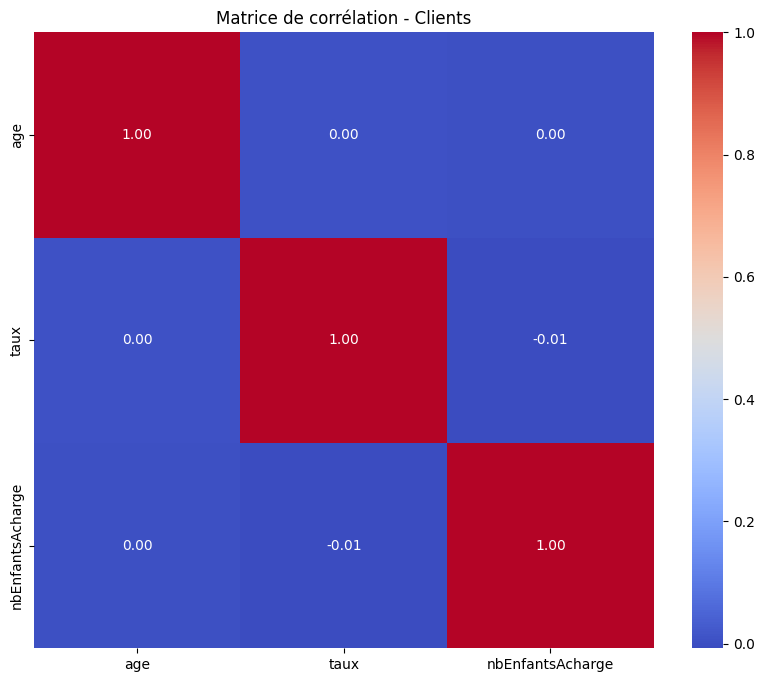

In [37]:
#Matrice de correlation de Clients
plot_correlation_heatmap(clients_corr, "Matrice de corrélation - Clients")

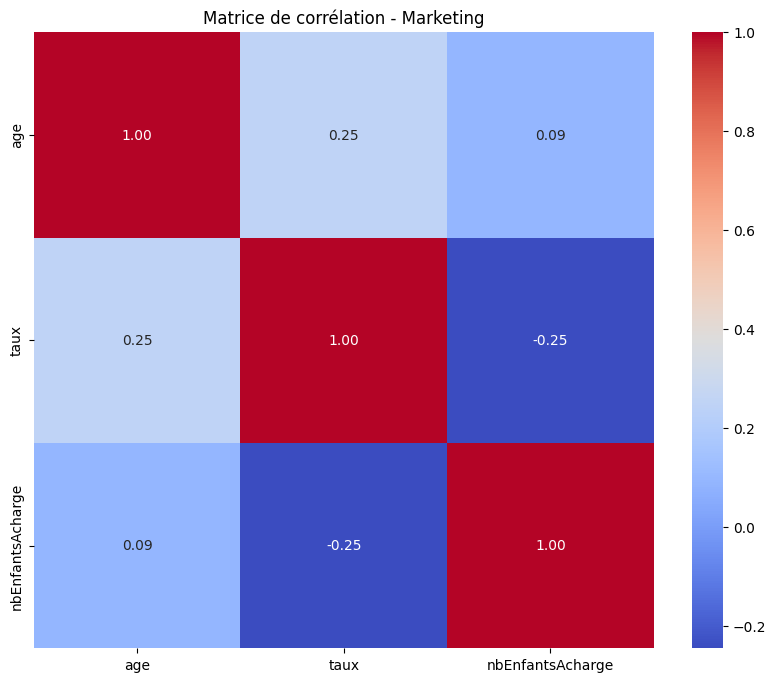

In [38]:
#Matrice de correlation de Marketing
plot_correlation_heatmap(marketing_corr, "Matrice de corrélation - Marketing")

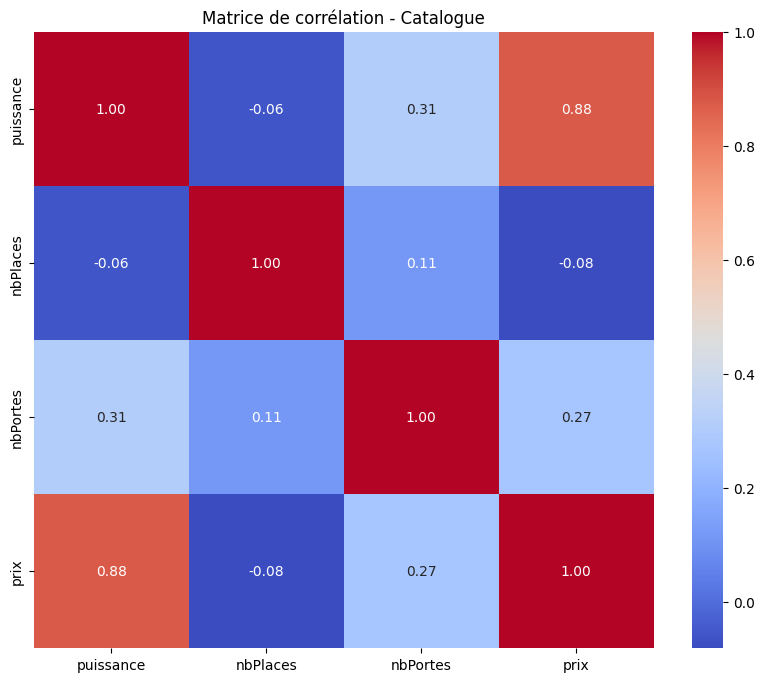

In [39]:
#Matrice de correlation de Catalogue
plot_correlation_heatmap(catalogue_corr, "Matrice de corrélation - Catalogue")

# **Visualisation des Données**

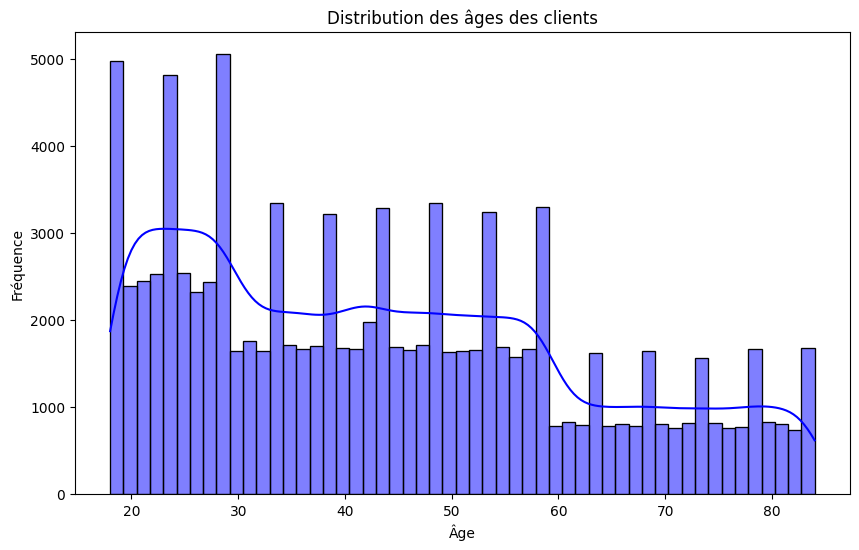

In [40]:
# Distribution des âges dans le dataset clients
plt.figure(figsize=(10, 6))
sns.histplot(clients['age'], kde=True, color='blue')
plt.title("Distribution des âges des clients")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

<ipython-input-41-dd0437e18e03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=marketing['situationFamiliale'], palette="Set2")


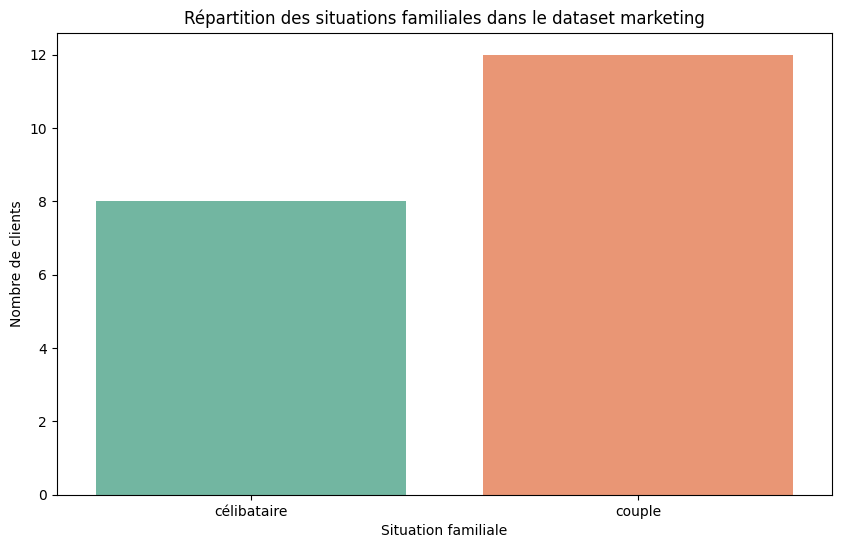

In [41]:
# Barplot des situations familiales pour le dataset marketing
plt.figure(figsize=(10, 6))
sns.countplot(x=marketing['situationFamiliale'], palette="Set2")
plt.title("Répartition des situations familiales dans le dataset marketing")
plt.xlabel("Situation familiale")
plt.ylabel("Nombre de clients")
plt.show()

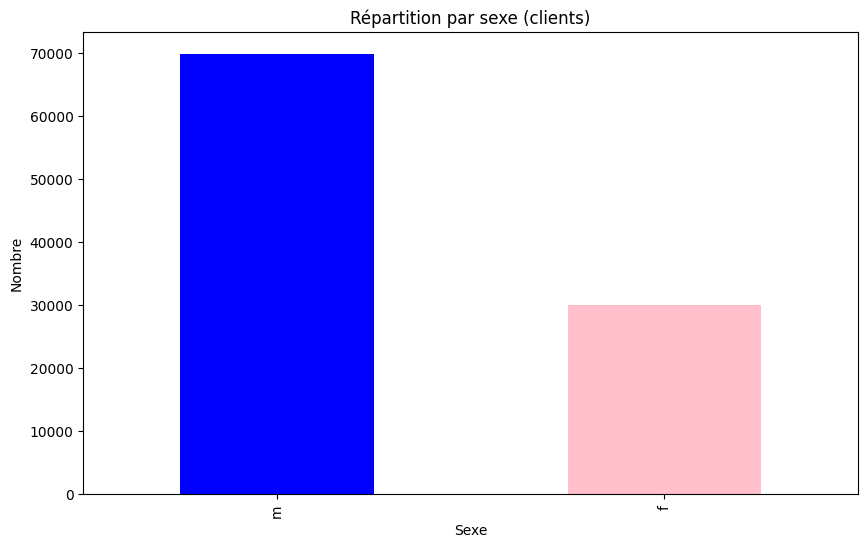

In [42]:
# Barplot pour le sexe dans le dataset clients
plt.figure(figsize=(10, 6))
clients['sexe'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title("Répartition par sexe (clients)")
plt.xlabel("Sexe")
plt.ylabel("Nombre")
plt.show()

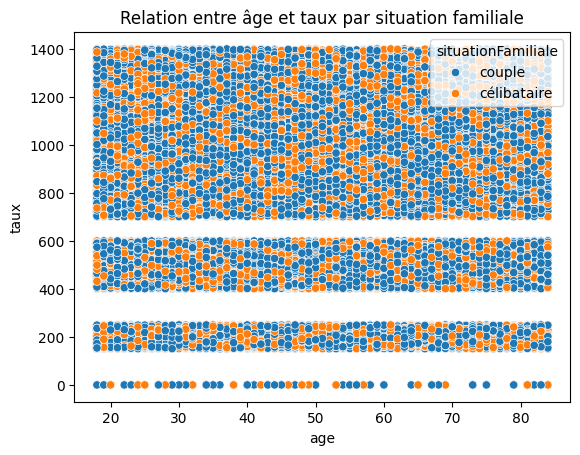

In [43]:
# Relation entre 'age' et 'taux' pour les clients
sns.scatterplot(data=clients, x='age', y='taux', hue='situationFamiliale')
plt.title("Relation entre âge et taux par situation familiale")
plt.show()

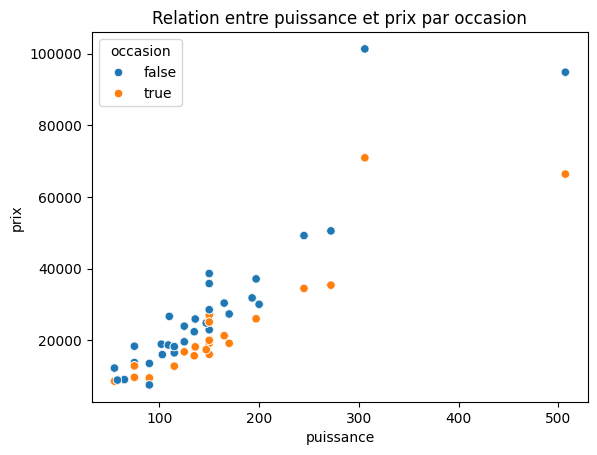

In [44]:
# Relation entre 'prix' et 'puissance' dans le catalogue
sns.scatterplot(data=catalogue, x='puissance', y='prix', hue='occasion')
plt.title("Relation entre puissance et prix par occasion")
plt.show()

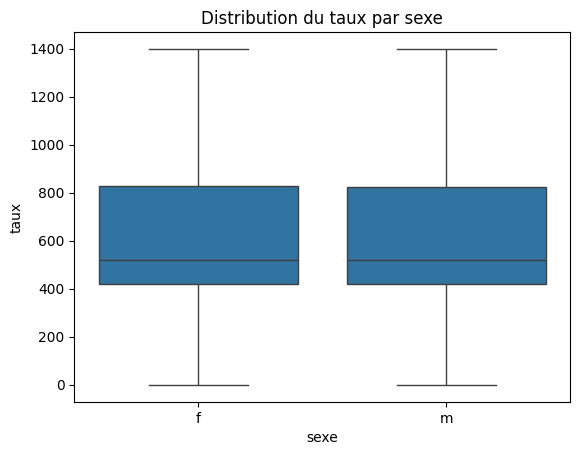

In [45]:
# Distribution du taux en fonction du sexe
sns.boxplot(data=clients, x='sexe', y='taux')
plt.title("Distribution du taux par sexe")
plt.show()

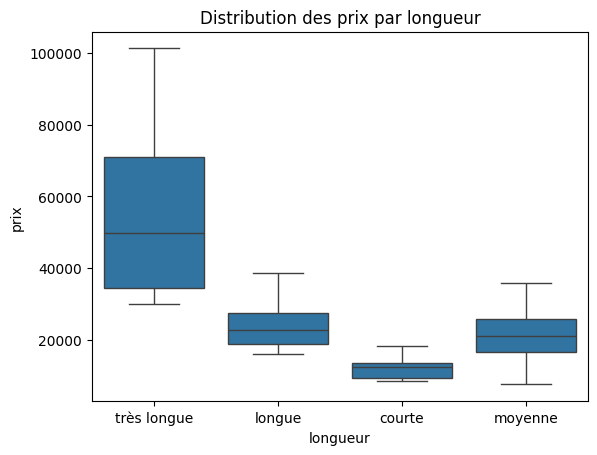

In [46]:
# Distribution des prix en fonction de la longueur des véhicules
sns.boxplot(data=catalogue, x='longueur', y='prix')
plt.title("Distribution des prix par longueur")
plt.show()

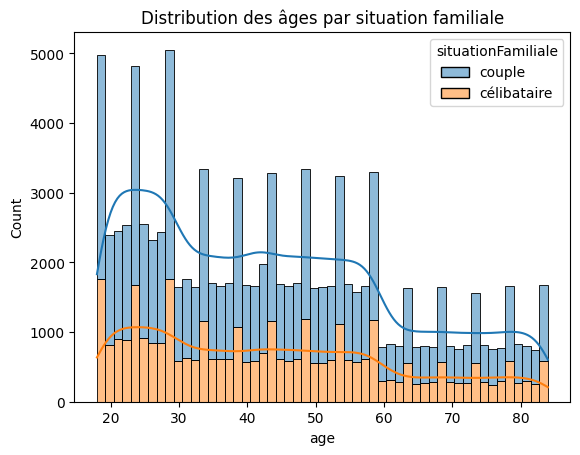

In [47]:
# Histogramme des âges par situation familiale
sns.histplot(data=clients, x='age', hue='situationFamiliale', kde=True, multiple='stack')
plt.title("Distribution des âges par situation familiale")
plt.show()

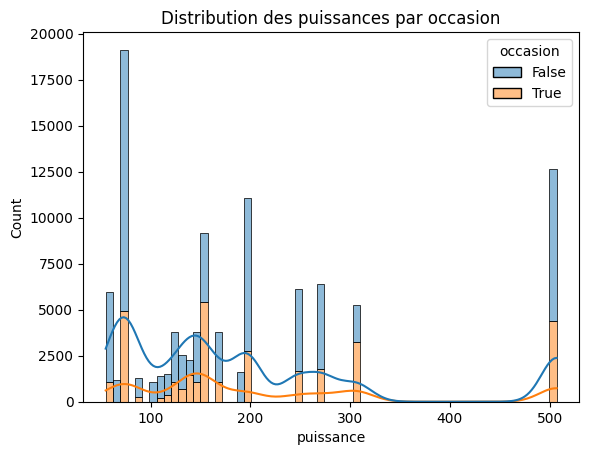

In [48]:
# Histogramme des puissances par occasion
sns.histplot(data=immatriculations, x='puissance', hue='occasion', kde=True, multiple='stack')
plt.title("Distribution des puissances par occasion")
plt.show()

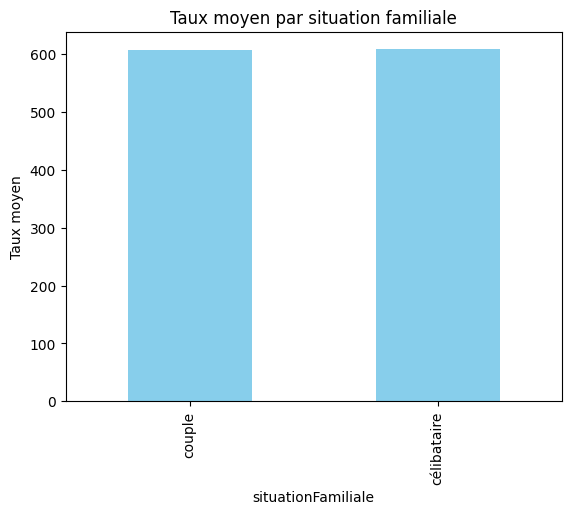

In [49]:
# Moyenne du taux par situation familiale
clients.groupby('situationFamiliale')['taux'].mean().plot(kind='bar', color='skyblue')
plt.title("Taux moyen par situation familiale")
plt.ylabel("Taux moyen")
plt.show()

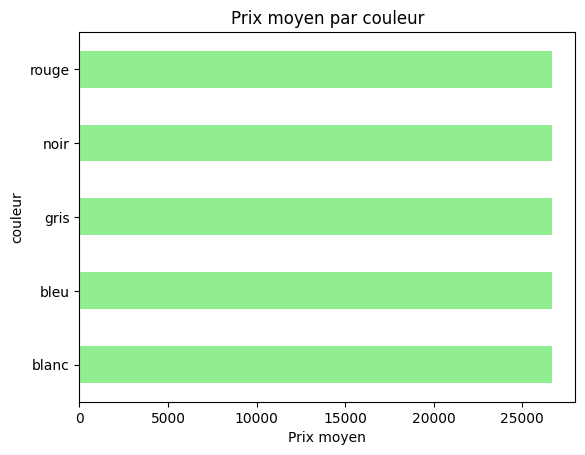

In [50]:
# Moyenne des prix par couleur
catalogue.groupby('couleur')['prix'].mean().sort_values().plot(kind='barh', color='lightgreen')
plt.title("Prix moyen par couleur")
plt.xlabel("Prix moyen")
plt.show()

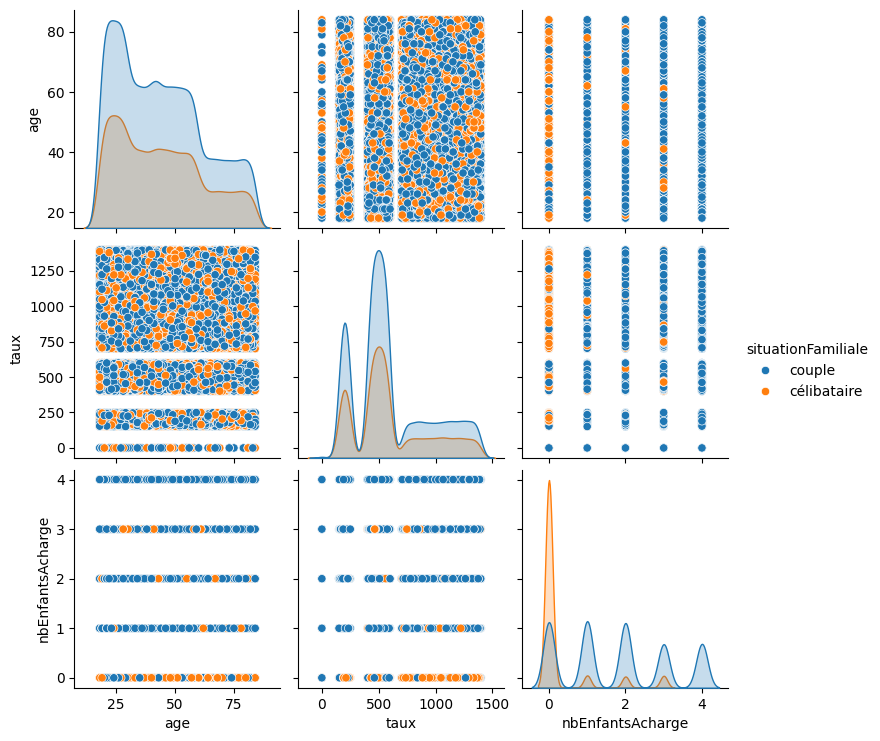

In [51]:
sns.pairplot(clients, hue='situationFamiliale', vars=['age', 'taux', 'nbEnfantsAcharge'])
plt.show()


# **2. Identification des catégories de véhicules**

In [52]:
# Extraction des colonnes numériques pour normalisation
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

catalogue['longueur'] = label_encoder.fit_transform(catalogue['longueur'])

features = catalogue[['prix', 'puissance', 'longueur']]

# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

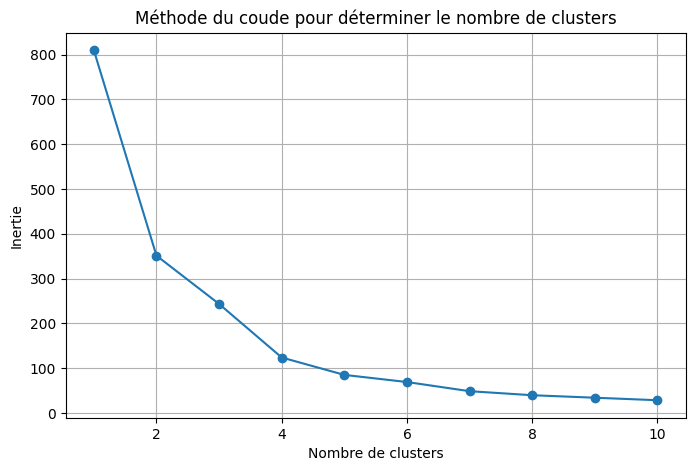

In [53]:
 # Calcul de l'inertie pour différents nombres de clusters
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Méthode du coude pour déterminer le nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

In [54]:
# Choix du nombre de clusters
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
catalogue['categorie'] = kmeans.fit_predict(scaled_features)

In [55]:
# Analyse des catégories générées
print(catalogue[['nom', 'puissance', 'prix', 'longueur', 'categorie']].head())

      nom  puissance   prix  longueur  categorie
0  s80 t6        272  50500         3          4
1  s80 t6        272  50500         3          4
2  s80 t6        272  50500         3          4
3  s80 t6        272  35350         3          4
4  s80 t6        272  35350         3          4


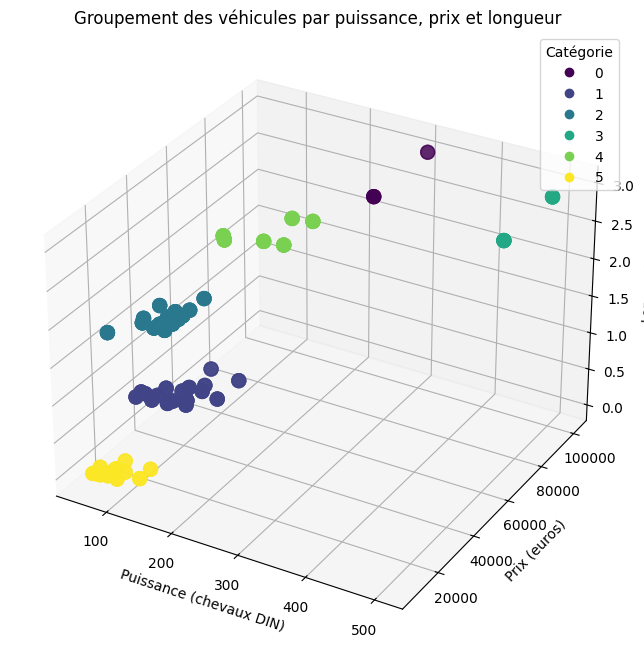

In [56]:
from mpl_toolkits.mplot3d import Axes3D

# Visualisation en 3D des clusters (prix, puissance, longueur)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Propriétés du scatter plot
sc = ax.scatter(
    catalogue['puissance'],
    catalogue['prix'],
    catalogue['longueur'],
    c=catalogue['categorie'],
    cmap='viridis',
    s=100
)

# Ajouter les labels et le titre
ax.set_xlabel('Puissance (chevaux DIN)')
ax.set_ylabel('Prix (euros)')
ax.set_zlabel('Longueur')
ax.set_title('Groupement des véhicules par puissance, prix et longueur')

# Légende
plt.legend(*sc.legend_elements(), title="Catégorie")

plt.show()


In [57]:
# Uniformisation des noms de colonnes pour éviter les erreurs
clients.columns = clients.columns.str.strip().str.lower()
immatriculations.columns = immatriculations.columns.str.strip().str.lower()
catalogue.columns = catalogue.columns.str.lower()

# **3. Fusion des données Clients et Immatriculations**

In [58]:
clients.head()

,age,sexe,taux,situationfamiliale,nbenfantsacharge,2eme voiture,immatriculation
0,25.0,f,159.0,couple,2.0,false,3467 sb 72
1,53.0,m,594.0,couple,2.0,false,113 ly 42
2,20.0,f,949.0,couple,1.0,false,925 wk 87
3,29.0,m,571.0,couple,2.0,false,3279 rv 81
4,47.0,m,502.0,couple,1.0,false,82 rz 54


In [59]:
immatriculations.head()

,immatriculation,marque,nom,puissance,longueur,nbplaces,nbportes,couleur,occasion,prix
0,3467 sb 72,seat,toledo 1.6,102,longue,5,5,bleu,False,18880
1,113 ly 42,renault,vel satis 3.5 v6,245,très longue,5,5,noir,False,49200
2,925 wk 87,jaguar,x-type 2.5 v6,197,longue,5,5,blanc,False,37100
3,3279 rv 81,renault,laguna 2.0t,170,longue,5,5,gris,False,27300
4,82 rz 54,fiat,croma 2.2,147,longue,5,5,bleu,False,24780


In [60]:
clients_immatriculations = pd.merge(clients, immatriculations, on='immatriculation', how='inner')

In [61]:
# Afficher les premières lignes
clients_immatriculations.head()

,age,sexe,taux,situationfamiliale,nbenfantsacharge,2eme voiture,immatriculation,marque,nom,puissance,longueur,nbplaces,nbportes,couleur,occasion,prix
0,25.0,f,159.0,couple,2.0,false,3467 sb 72,seat,toledo 1.6,102,longue,5,5,bleu,False,18880
1,53.0,m,594.0,couple,2.0,false,113 ly 42,renault,vel satis 3.5 v6,245,très longue,5,5,noir,False,49200
2,20.0,f,949.0,couple,1.0,false,925 wk 87,jaguar,x-type 2.5 v6,197,longue,5,5,blanc,False,37100
3,29.0,m,571.0,couple,2.0,false,3279 rv 81,renault,laguna 2.0t,170,longue,5,5,gris,False,27300
4,47.0,m,502.0,couple,1.0,false,82 rz 54,fiat,croma 2.2,147,longue,5,5,bleu,False,24780


# **4. Attribution des catégories aux immatriculations**

In [62]:
immatriculations_categorisees = pd.merge(clients_immatriculations, catalogue[['nom', 'categorie']], on='nom', how='left')

In [63]:
# Afficher les premières lignes pour vérification
immatriculations_categorisees.head()

,age,sexe,taux,situationfamiliale,nbenfantsacharge,2eme voiture,immatriculation,marque,nom,puissance,longueur,nbplaces,nbportes,couleur,occasion,prix,categorie
0,25.0,f,159.0,couple,2.0,false,3467 sb 72,seat,toledo 1.6,102,longue,5,5,bleu,False,18880,1
1,25.0,f,159.0,couple,2.0,false,3467 sb 72,seat,toledo 1.6,102,longue,5,5,bleu,False,18880,1
2,25.0,f,159.0,couple,2.0,false,3467 sb 72,seat,toledo 1.6,102,longue,5,5,bleu,False,18880,1
3,25.0,f,159.0,couple,2.0,false,3467 sb 72,seat,toledo 1.6,102,longue,5,5,bleu,False,18880,1
4,25.0,f,159.0,couple,2.0,false,3467 sb 72,seat,toledo 1.6,102,longue,5,5,bleu,False,18880,1


In [64]:
# Suppression des doublons de lignes
immatriculations_categorisees = immatriculations_categorisees.drop_duplicates()

In [65]:
# Vérification après nettoyage
print(immatriculations_categorisees.head())
print(immatriculations_categorisees.info())

     age sexe   taux situationfamiliale  nbenfantsacharge 2eme voiture  \
0   25.0    f  159.0             couple               2.0        false   
5   53.0    m  594.0             couple               2.0        false   
15  20.0    f  949.0             couple               1.0        false   
25  29.0    m  571.0             couple               2.0        false   
35  47.0    m  502.0             couple               1.0        false   

   immatriculation   marque               nom  puissance     longueur  \
0       3467 sb 72     seat        toledo 1.6        102       longue   
5        113 ly 42  renault  vel satis 3.5 v6        245  très longue   
15       925 wk 87   jaguar     x-type 2.5 v6        197       longue   
25      3279 rv 81  renault       laguna 2.0t        170       longue   
35        82 rz 54     fiat         croma 2.2        147       longue   

    nbplaces  nbportes couleur  occasion   prix  categorie  
0          5         5    bleu     False  18880        

In [66]:
# Résumé des catégories après suppression des doublons
print(immatriculations_categorisees['categorie'].value_counts())

categorie
5    27558
1    27082
4    15716
3    12616
2    11458
0     5240
Name: count, dtype: int64


# **5. Modèle de classification supervisée**

In [67]:
# Affiche les valeurs uniques des colonnes
print("age : ",immatriculations_categorisees['age'].unique())
print("sexe : ",immatriculations_categorisees['sexe'].unique())
print("taux : ",immatriculations_categorisees['taux'].unique())
print("situationFamiliale : ",immatriculations_categorisees['situationfamiliale'].unique())
print("nbEnfantsAcharge : ",immatriculations_categorisees['nbenfantsacharge'].unique())
print("2eme voiture : ",immatriculations_categorisees['2eme voiture'].unique())
print("immatriculation : ",immatriculations_categorisees['immatriculation'].unique())
print("marque : ",immatriculations_categorisees['marque'].unique())
print("nom : ",immatriculations_categorisees['nom'].unique())
print("puissance : ",immatriculations_categorisees['puissance'].unique())
print("longueur : ",immatriculations_categorisees['longueur'].unique())
print("nbPlaces : ",immatriculations_categorisees['nbplaces'].unique())
print("nbPortes : ",immatriculations_categorisees['nbportes'].unique())
print("couleur : ",immatriculations_categorisees['couleur'].unique())
print("occasion : ",immatriculations_categorisees['occasion'].unique())
print("prix : ",immatriculations_categorisees['prix'].unique())
print("categorie : ",immatriculations_categorisees['categorie'].unique())

age :  [25. 53. 20. 29. 47. 52. 58. 21. 42. 66. 54. 41. 63. 46. 43. 23. 49. 65.
 24. 64. 45. 40. 28. 18. 32. 34. 36. 55. 79. 33. 39. 48. 71. 51. 57. 37.
 81. 75. 62. 19. 30. 67. 26. 22. 80. 83. 82. 38. 35. 72. 70. 27. 77. 59.
 60. 31. 73. 76. 61. 44. 68. 69. 50. 78. 56. 74. 84.]
sexe :  ['f' 'm']
taux :  [159. 594. 949. ... 882. 886. 900.]
situationFamiliale :  ['couple' 'célibataire']
nbEnfantsAcharge :  [2. 1. 3. 4. 0.]
2eme voiture :  ['false' 'true']
immatriculation :  ['3467 sb 72' '113 ly 42' '925 wk 87' ... '5803 ls 45' '3783 dx 64'
 '4656 ej 74']
marque :  ['seat' 'renault' 'jaguar' 'fiat' 'bmw' 'volvo' 'peugeot' 'nissan'
 'mercedes' 'audi' 'kia' 'volkswagen' 'ford' 'mini' 'dacia' 'daihatsu'
 'lancia' 'saab' 'skoda']
nom :  ['toledo 1.6' 'vel satis 3.5 v6' 'x-type 2.5 v6' 'laguna 2.0t' 'croma 2.2'
 'm5' 's80 t6' 'megane 2.0 16v' '1007 1.4' 'maxima 3.0 v6' 's500' 'a2 1.4'
 'picanto 1.1' 'polo 1.2 6v' 'mondeo 1.8' 'copper 1.6 16v' 'golf 2.0 fsi'
 'logan 1.6 mpi' 'cuore 1.0' 'ypsi

In [68]:
# Initialisation de l'encodeur
label_encoder = LabelEncoder()

immatriculations_categorisees.dropna(inplace=True)

# Traitement de la colonne 'sexe'
immatriculations_categorisees['sexe'] = immatriculations_categorisees['sexe'].fillna('Inconnu')
immatriculations_categorisees['sexe'] = label_encoder.fit_transform(immatriculations_categorisees['sexe'])

# Traitement de la colonne '2eme voiture'
immatriculations_categorisees['2eme voiture'] = immatriculations_categorisees['2eme voiture'].apply(lambda x: 1 if x == True else 0)

# Traitement de la colonne 'longueur'
immatriculations_categorisees['longueur'] = immatriculations_categorisees['longueur'].fillna('Inconnu')
immatriculations_categorisees['longueur'] = label_encoder.fit_transform(immatriculations_categorisees['longueur'])

immatriculations_categorisees['situationfamiliale'] = immatriculations_categorisees['situationfamiliale'].fillna('Inconnu')
immatriculations_categorisees['situationfamiliale'] = label_encoder.fit_transform(immatriculations_categorisees['situationfamiliale'])

In [69]:
# Définir les variables indépendantes (X) et la cible (y)
X = immatriculations_categorisees[['age', 'sexe', 'taux', 'situationfamiliale', 'nbenfantsacharge','2eme voiture']]
y = immatriculations_categorisees['categorie']

In [70]:
# Encoder les variables catégorielles
le = LabelEncoder()
X['sexe'] = le.fit_transform(X['sexe'])

le_sexe = LabelEncoder()
X['situationfamiliale'] = le.fit_transform(X['situationfamiliale'])

<ipython-input-70-9bd413a66744>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sexe'] = le.fit_transform(X['sexe'])
<ipython-input-70-9bd413a66744>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['situationfamiliale'] = le.fit_transform(X['situationfamiliale'])


In [71]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Standardisation des données (facultatif)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**1. Arbre de décision**

In [73]:
# Modèle
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
# Prédictions
y_pred_dt = dt_model.predict(X_test)

In [75]:
# Évaluation
print("Performance du modèle : Arbre de Décision")
print(f"Accuracy : {accuracy_score(y_test, y_pred_dt):.2f}")
print("Rapport de classification :")
print(classification_report(y_test, y_pred_dt))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_dt))

Performance du modèle : Arbre de Décision
Accuracy : 0.55
Rapport de classification :
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1071
           1       0.56      0.56      0.56      5339
           2       0.49      0.52      0.50      2361
           3       0.54      0.57      0.56      2521
           4       0.59      0.57      0.58      3178
           5       0.53      0.50      0.52      5464

    accuracy                           0.55     19934
   macro avg       0.56      0.57      0.57     19934
weighted avg       0.55      0.55      0.55     19934

Matrice de confusion :
[[ 752  238    0    2    4   75]
 [ 254 3012   12  562  644  855]
 [   1   11 1236    4    6 1103]
 [   2  524    2 1429  387  177]
 [   3  716    3  432 1816  208]
 [  94  925 1294  194  221 2736]]


**2. Forêt aléatoire**

In [76]:
# Modèle
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
# Prédictions
y_pred_rf = rf_model.predict(X_test)

In [78]:
# Évaluation
print("Performance du modèle : Forêt Aléatoire")
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.2f}")
print("Rapport de classification :")
print(classification_report(y_test, y_pred_rf))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_rf))

Performance du modèle : Forêt Aléatoire
Accuracy : 0.56
Rapport de classification :
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1071
           1       0.54      0.61      0.58      5339
           2       0.50      0.49      0.49      2361
           3       0.57      0.53      0.55      2521
           4       0.61      0.58      0.59      3178
           5       0.54      0.52      0.53      5464

    accuracy                           0.56     19934
   macro avg       0.58      0.57      0.57     19934
weighted avg       0.56      0.56      0.56     19934

Matrice de confusion :
[[ 732  261    0    2    5   71]
 [ 213 3273    8  478  575  792]
 [   2    8 1155    1    6 1189]
 [   0  608    2 1331  420  160]
 [   1  810    1  353 1834  179]
 [  60 1054 1164  164  179 2843]]


**4. Réseau de neurones(MLP)**

In [79]:
# Modèle
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [80]:
# Prédictions
y_pred_mlp = mlp_model.predict(X_test)

In [81]:
# Évaluation
print("Performance du modèle : Réseau de Neurones (MLP)")
print(f"Accuracy : {accuracy_score(y_test, y_pred_mlp):.2f}")
print("Rapport de classification :")
print(classification_report(y_test, y_pred_mlp))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_mlp))

Performance du modèle : Réseau de Neurones (MLP)
Accuracy : 0.63
Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.57      0.71      1071
           1       0.54      0.99      0.70      5339
           2       0.48      0.18      0.26      2361
           3       0.98      0.40      0.56      2521
           4       0.78      0.59      0.67      3178
           5       0.63      0.59      0.61      5464

    accuracy                           0.63     19934
   macro avg       0.72      0.56      0.59     19934
weighted avg       0.67      0.63      0.60     19934

Matrice de confusion :
[[ 614  440    0    9    8    0]
 [  35 5294    0    5    2    3]
 [   1   16  427    0    1 1916]
 [   0  989    0 1002  528    2]
 [   0 1282    0    7 1888    1]
 [  10 1741  461    3    0 3249]]


**5. Deep Learning (TensorFlow/Keras)**

In [82]:
# Construction du modèle de deep learning
deep_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(y.unique()), activation='softmax')  # Nombre de classes uniques
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
# Compilation du modèle de deep learning
deep_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [84]:
# Entraînement
deep_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2549 - loss: 7.5537 - val_accuracy: 0.2778 - val_loss: 1.6600
Epoch 2/10
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.2768 - loss: 1.6703 - val_accuracy: 0.2777 - val_loss: 1.6588
Epoch 3/10
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2810 - loss: 1.6669 - val_accuracy: 0.2778 - val_loss: 1.6588
Epoch 4/10
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2760 - loss: 1.6658 - val_accuracy: 0.2743 - val_loss: 1.6587
Epoch 5/10
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2778 - loss: 1.6652 - val_accuracy: 0.2778 - val_loss: 1.6587
Epoch 6/10
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2762 - loss: 1.6651 - val_accuracy: 0.2778 - val_loss: 1.6589
Epoch 7/10
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.2776 - loss: 1.6653 - val_accuracy: 0.2778 - val_loss: 1.6588
Epoch 8/10
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2763 - loss: 1.6678 

In [85]:
# Évaluation
loss, accuracy = deep_model.evaluate(X_test, y_test)
print(f"Performance du modèle : Deep Learning")
print(f"Accuracy : {accuracy:.2f}")

623/623 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2740 - loss: 1.6731
Performance du modèle : Deep Learning
Accuracy : 0.27


In [87]:
# Accuracy des models
models_accuracy = {
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "MLP": accuracy_score(y_test, y_pred_mlp),
    "Deep Learning": accuracy
}

# Affichage des performances
for model, acc in models_accuracy.items():
    print(f"{model} : {acc:.2f}")

Decision Tree : 0.55
Random Forest : 0.56
MLP : 0.63
Deep Learning : 0.27
